<a href="https://colab.research.google.com/github/Lucas-Siade/Data-Science/blob/main/Codes/N%C3%A3o%20Supervisionado/DS%20-%20Hierarchical%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exemplo**

## **Bibliotecas**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

## **Dataset**

In [4]:
datasetHC = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Dataset - Iris.csv")

#DEFINIÇÃO DAS COLUNAS
datasetHC.drop(['Id'], axis=1, inplace=True)

datasetHC.rename(columns={
    'SepalLengthCm': 'Comprimento da Sépala',
    'SepalWidthCm': 'Largura da Sépala',
    'PetalLengthCm': 'Comprimento da Pétala',
    'PetalWidthCm': 'Largura da Pétala',
    'Species': 'Espécie',
}, inplace=True)

display(datasetHC.head())

,Comprimento da Sépala,Largura da Sépala,Comprimento da Pétala,Largura da Pétala,Espécie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


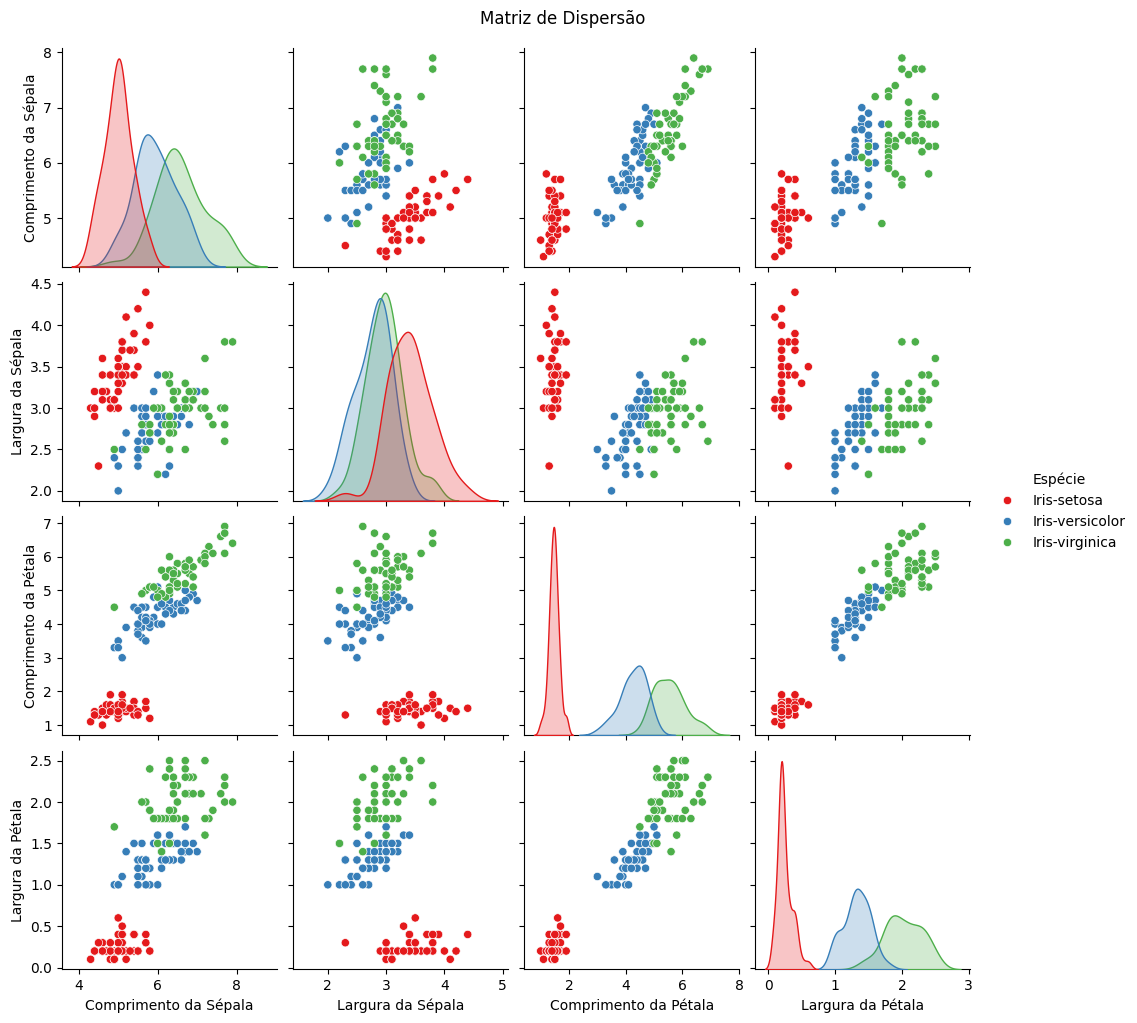

In [5]:
sns.pairplot(datasetHC, hue='Espécie', palette='Set1')
plt.suptitle('Matriz de Dispersão', y=1.02)
plt.show()

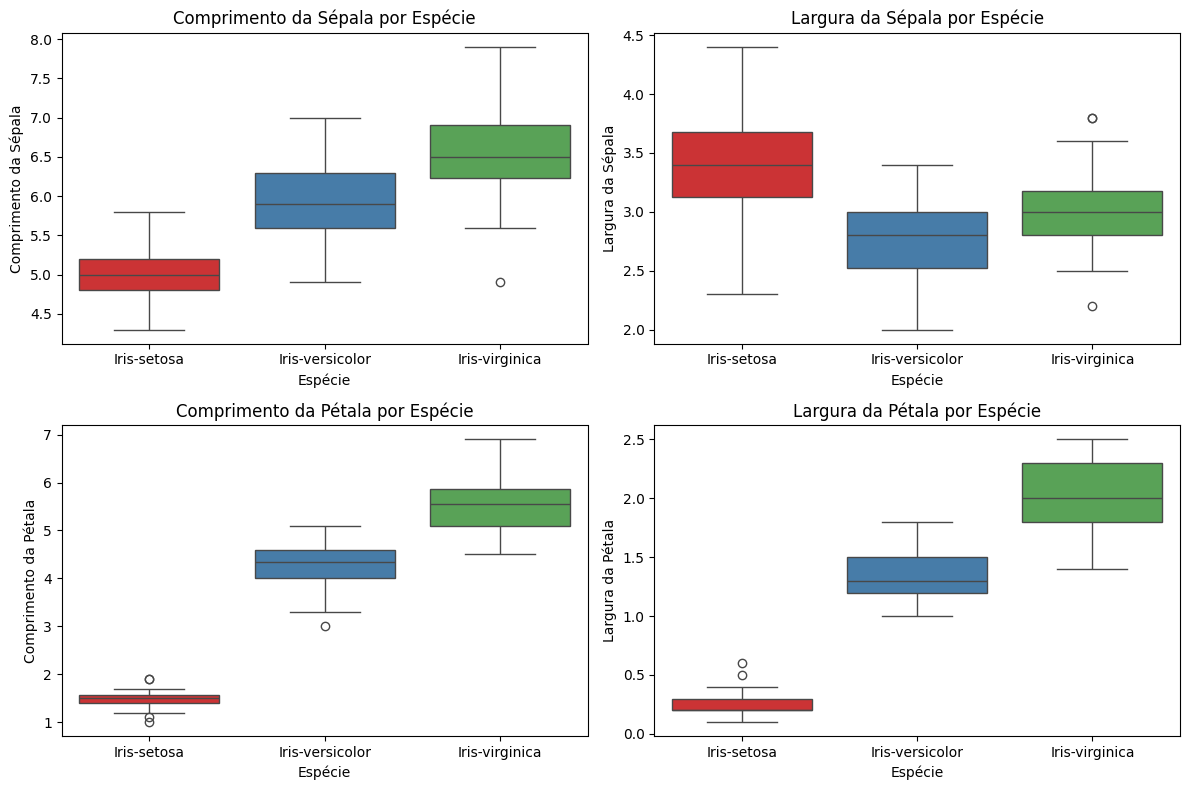

In [6]:
plt.figure(figsize=(12, 8))

for i, coluna in enumerate(datasetHC.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=datasetHC, x='Espécie', y=coluna, hue='Espécie', palette='Set1', legend=False)
    plt.title(f'{coluna} por Espécie')

plt.tight_layout()
plt.show()

In [7]:
#FUNÇÃO PARA REMOVER OUTLIERS
def remover_outliers_por_categoria(dataset, coluna_valor, coluna_categoria):
    datasetArrumado = pd.DataFrame()

    for categoria in dataset[coluna_categoria].unique():
        grupo = dataset[dataset[coluna_categoria] == categoria]

        Q1 = grupo[coluna_valor].quantile(0.25)
        Q3 = grupo[coluna_valor].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        grupo_filtrado = grupo[(grupo[coluna_valor] >= limite_inferior) & (grupo[coluna_valor] <= limite_superior)]
        datasetArrumado = pd.concat([datasetArrumado, grupo_filtrado])

    return datasetArrumado

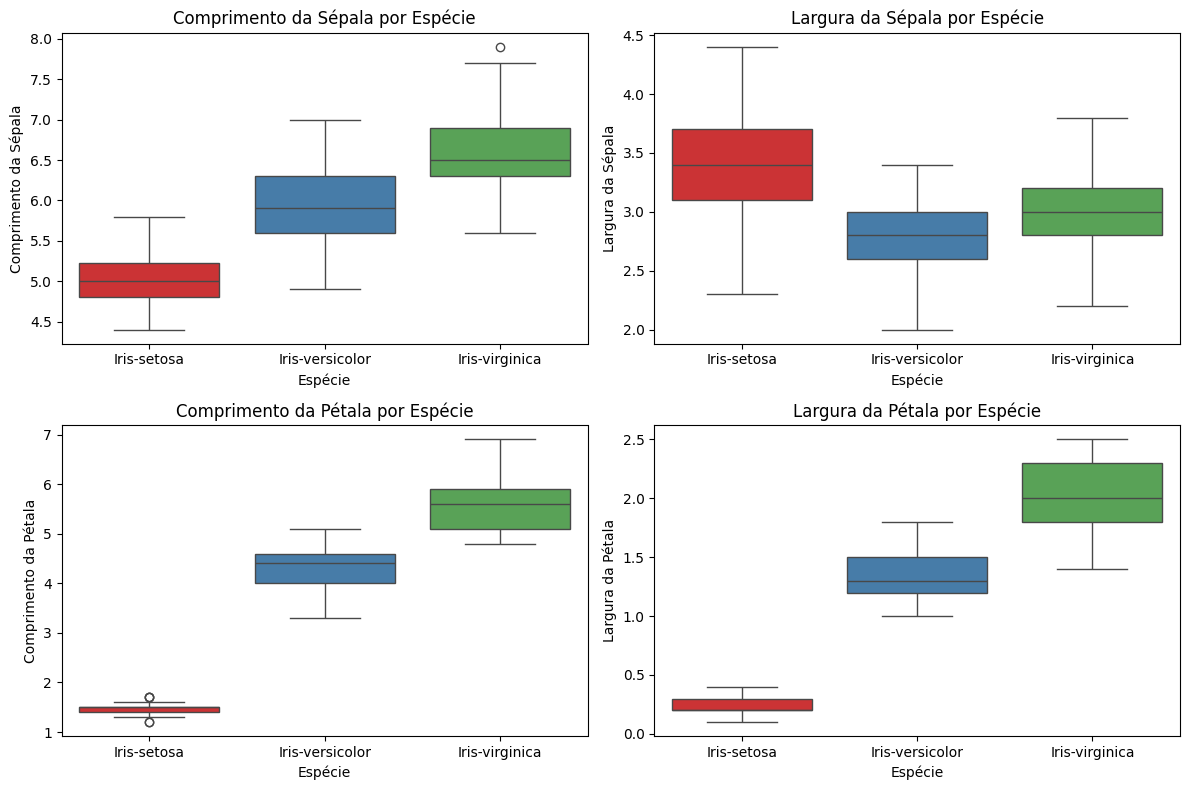

In [8]:
datasetHCArrumado = datasetHC.copy()

colunas = ['Comprimento da Sépala', 'Largura da Sépala',
           'Comprimento da Pétala', 'Largura da Pétala']

for coluna in colunas:
    datasetHCArrumado = remover_outliers_por_categoria(datasetHCArrumado, coluna, 'Espécie')

plt.figure(figsize=(12, 8))
for i, coluna in enumerate(datasetHCArrumado.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=datasetHCArrumado, x='Espécie', y=coluna, hue='Espécie', palette='Set1', legend=False)
    plt.title(f'{coluna} por Espécie')
plt.tight_layout()
plt.show()

## **Modelo**

In [9]:
#DEFINIR VARIÁVEIS
XHC = datasetHC.drop('Espécie', axis=1)

scaler = StandardScaler()
XHC_scaled = scaler.fit_transform(XHC)

#TREINO DO MODELO
linkageHC = linkage(XHC_scaled, method='ward')

## **Extra**

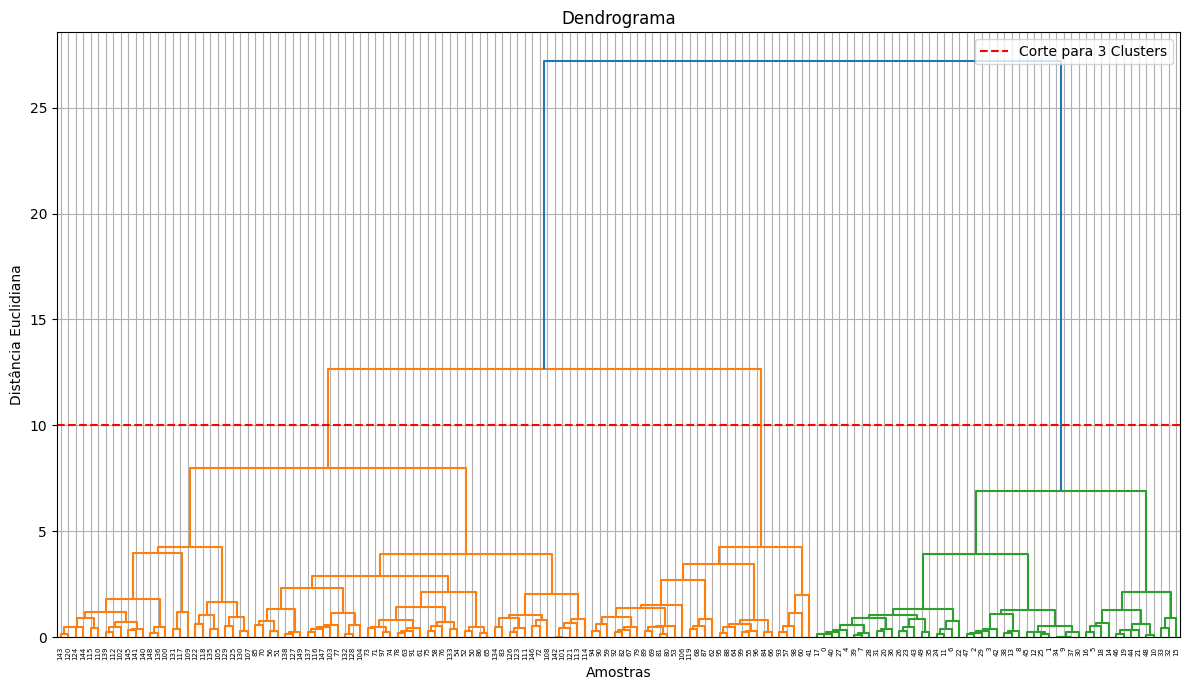

In [10]:
plt.figure(figsize=(12, 7))
dendrogram(linkageHC,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.axhline(y=10, color='red', linestyle='--', label='Corte para 3 Clusters')
plt.title('Dendrograma')
plt.xlabel('Amostras')
plt.ylabel('Distância Euclidiana')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

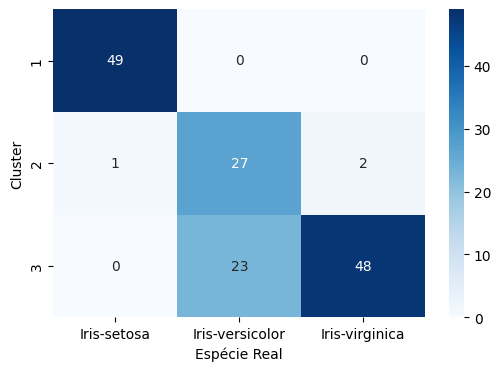

In [11]:
n_clusters = 3
clusters = fcluster(linkageHC, n_clusters, criterion='maxclust')
datasetHC['Cluster'] = clusters

tabela = pd.crosstab(datasetHC['Cluster'], datasetHC['Espécie'])

#HEATMAP
plt.figure(figsize=(6, 4))
sns.heatmap(tabela, annot=True, cmap='Blues', fmt='d')
plt.ylabel('Cluster')
plt.xlabel('Espécie Real')
plt.show()

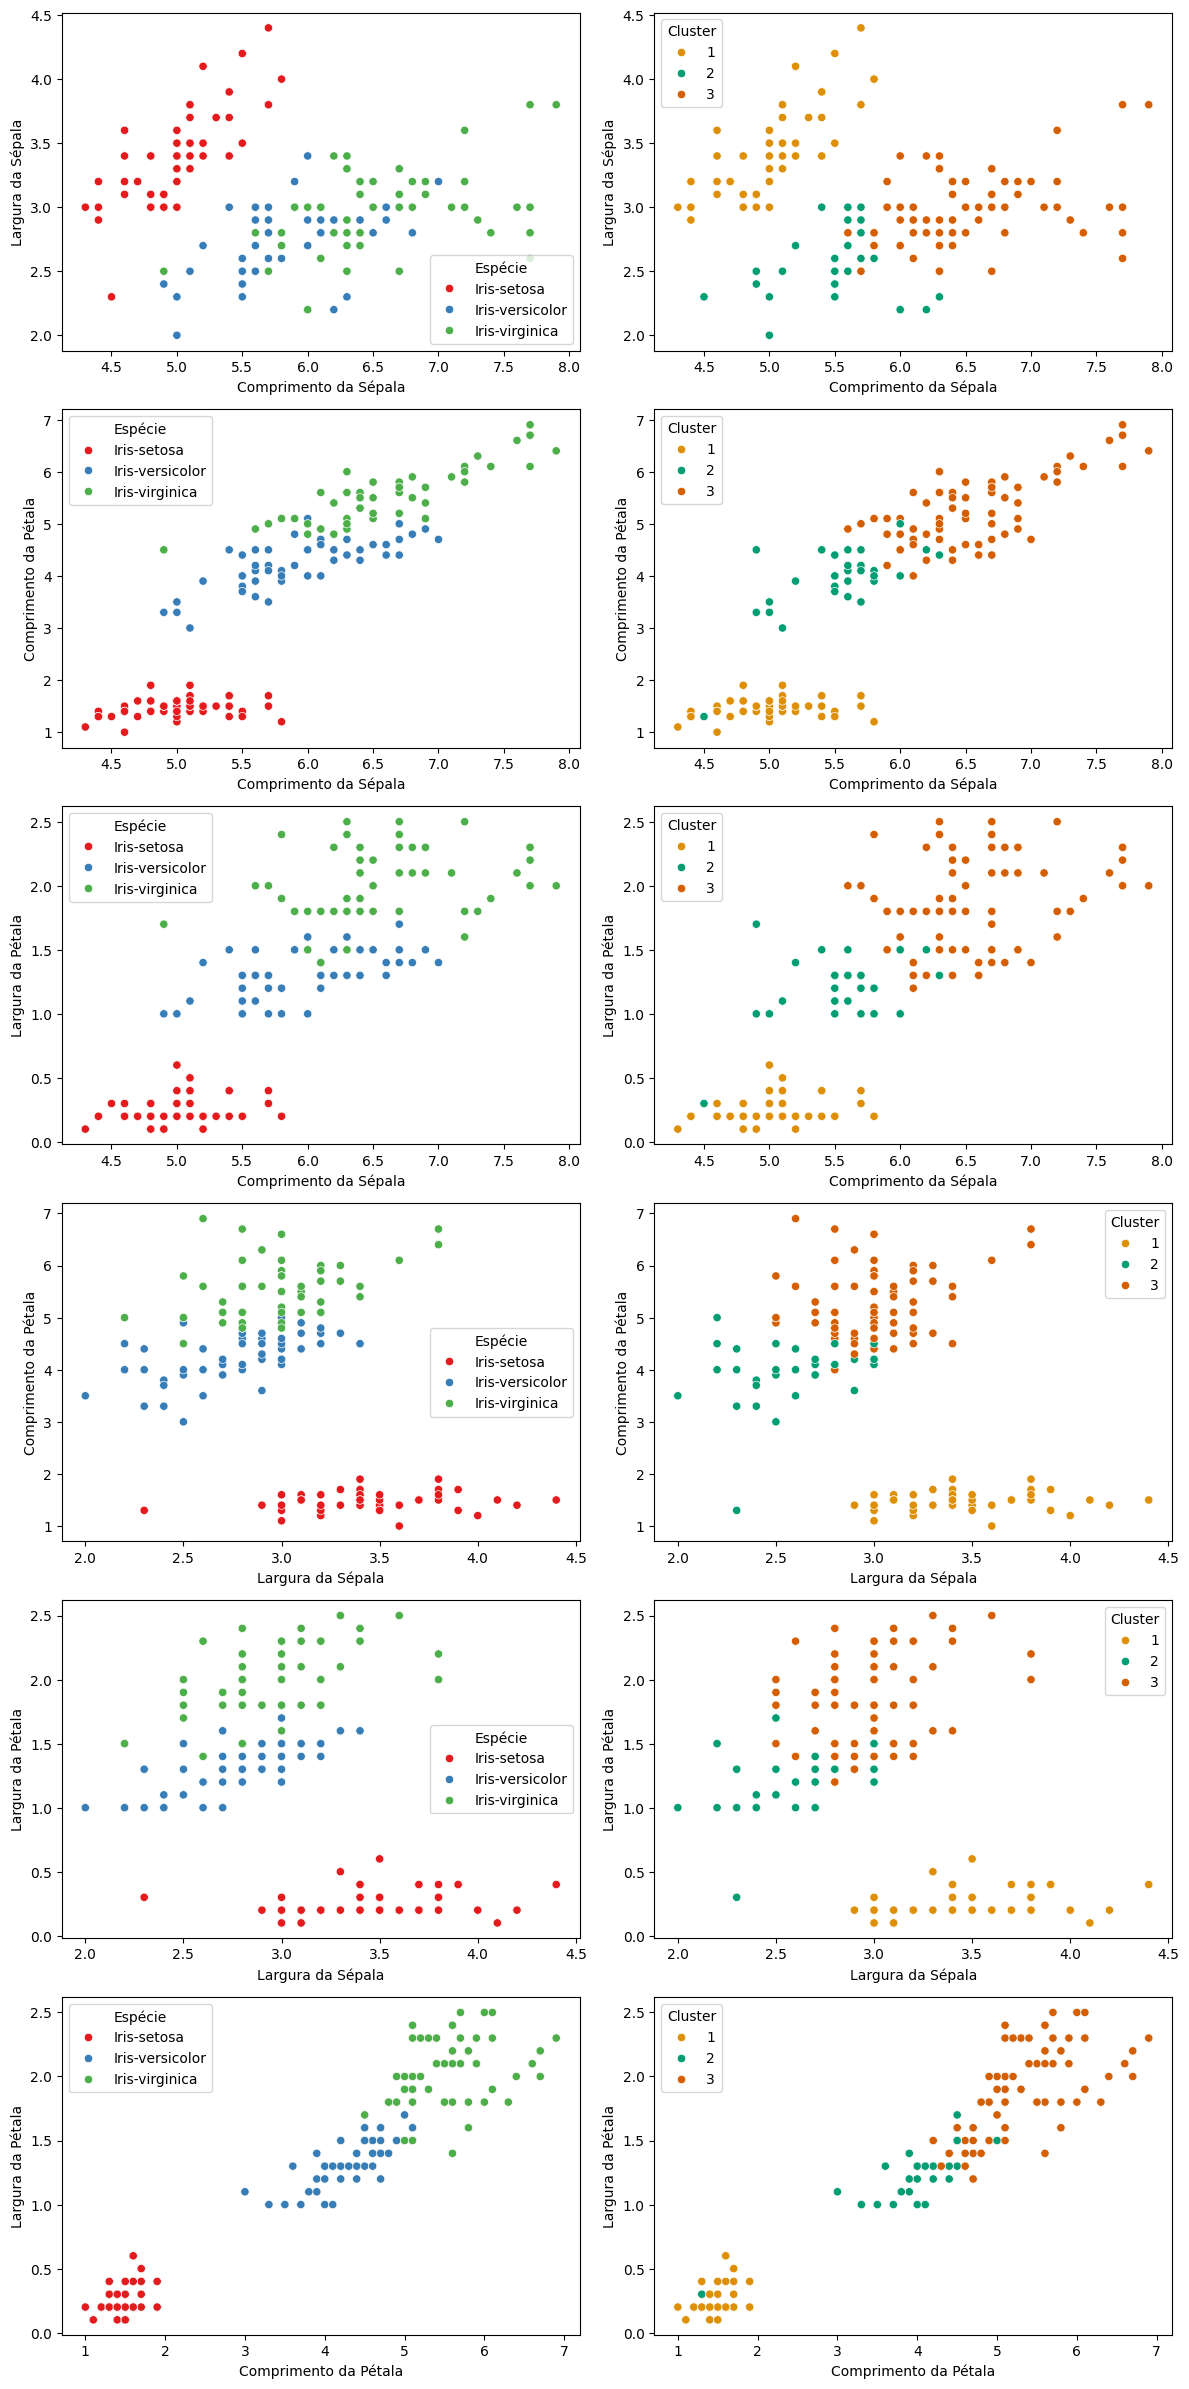

In [12]:
from itertools import combinations

features = XHC.columns

#GERA AS COMBINAÇÕES COM 2 FEATURES
combinations = list(combinations(features, 2))

plt.figure(figsize=(12, len(combinations) * 4))

for index, (x_feature, y_feature) in enumerate(combinations, 1):
    #GRÁFICO REAL
    plt.subplot(len(combinations), 2, 2 * index - 1)
    sns.scatterplot(
        x=datasetHC[x_feature],
        y=datasetHC[y_feature],
        hue=datasetHC["Espécie"],
        palette="Set1"
    )
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)

    #GRÁFICO COM HIERARCHICAL CLUSTERS
    plt.subplot(len(combinations), 2, 2 * index)
    sns.scatterplot(
        x=datasetHC[x_feature],
        y=datasetHC[y_feature],
        hue=datasetHC["Cluster"],
        palette=sns.color_palette("colorblind")[1:4]
    )
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)

plt.tight_layout()
plt.show()